# Comentarios sobre el problema 8

**Información del Autor**  
Notebook desarrollado por: Matías Leizerovich  
Contacto para preguntas o comentarios: mleize@df.uba.ar

Se realiza una serie de mediciones independientes $\{x_1, ..., x_n\}$, de una variable aleatoria X con distribución acumulativa $F_X(x)$ y densidad de probabilidad $F'_X(x) = f_X(x)$.

In [1]:
#Importamos librerias
import numpy as np
from scipy.stats import expon
from matplotlib import pyplot as plt

Definimos las funciones de probabilidad para el máximo y el mínimo del punto (a) y (b), respectivamente:

In [2]:
def f_U(dist, t, n):
    cdf = dist.cdf(t)
    pdf = dist.pdf(t)
    return n * pdf * cdf ** (n - 1)


def f_V(dist, t, n):
    cdf = dist.cdf(t)
    pdf = dist.pdf(t)
    return n * pdf * (1 - cdf) ** (n - 1)

Utilizamos la librería Scipy para trabajar con la PDF y la CDF de la distribución exponencial (pueden ver la documentación [acá](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html)): 

In [3]:
t = np.linspace(0, 200, 10000)
Lambda = 1 / 20  # unidades de 1/days
exponential = expon(scale=1 / Lambda)  # Distribucion exponencial con
# pdf = lambda * exp(-lambda * x)

Graficamos la función de densidad de probabilidad (PDF)  y la función de distribución acumulativa (CDF)

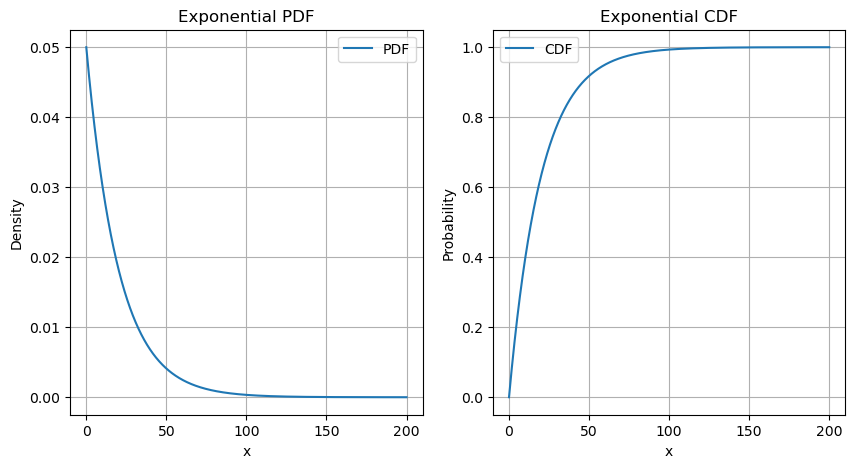

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].set_title("Exponential PDF")
axes[0].plot(t, exponential.pdf(t), label="PDF")
axes[0].set_xlabel("x")
axes[0].set_ylabel("Density")
axes[0].legend()
axes[0].grid()

axes[1].set_title("Exponential CDF")
axes[1].plot(t, exponential.cdf(t), label="CDF")
axes[1].set_xlabel("x")
axes[1].set_ylabel("Probability")
axes[1].legend()
axes[1].grid()
plt.show()


Cuando hicimos el punto (c) en el pizarrón, vimos que la distribución del mínimo era exponencial con $\tilde{\lambda}=N \cdot \lambda$, donde $N$ es el numero de realizaciones del vector de variables aleatorias $(X_1, X_2, ..., X_N)$.

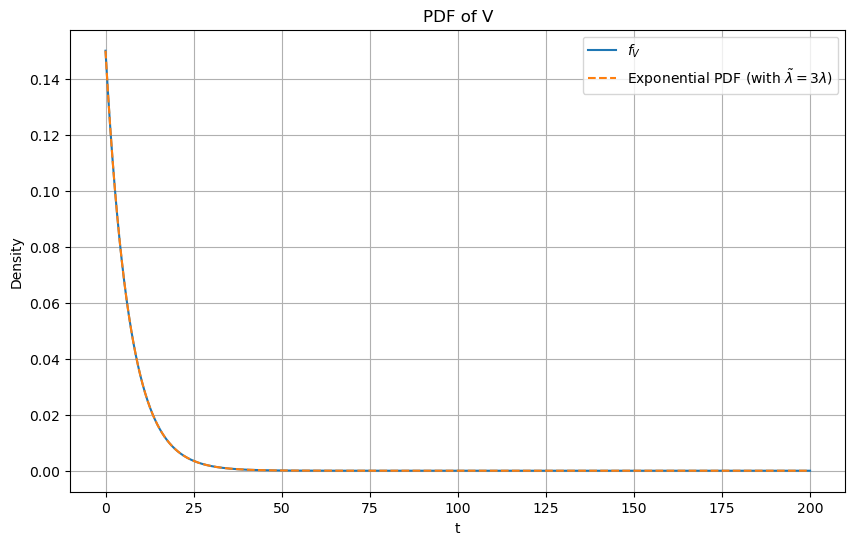

In [5]:
N = 3  # número de variables
tilde_Lambda = N * Lambda  # en unidades de 1/días
fV = f_V(exponential, t, N)

plt.figure(figsize=(10, 6))
plt.plot(t, fV, label=r"$f_V$")
plt.plot(
    t,
    expon(scale=1 / tilde_Lambda).pdf(t),
    "--",
    label=r"Exponential PDF (with $\tilde{\lambda}=3\lambda$)",
)
plt.title("PDF of V")
plt.xlabel("t")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()


# Simulación de Monte Carlo

Para terminar, vamos a samplear la distribución de máximos como discutimos oralmente en clase. Esto es, realizaremos $K$ realizaciones de cada variable aleatoria $X_i$ con $i \in [1,N]$. Para cada set de realizaciones, tomaremos el mínimo y guardaremos ese número aparte. Esto lo haremos para las $K$ realizaciones, por lo que tendremos $K$ números guardados. La idea clave es que si construimos un histograma utilizando estos valores reconstruimos la distribución de $f_V(x)$.

In [6]:
K = int(1e5)  # número de realizaciones
N = 3  # número de variables
Lambda = 1 / 20  # en unidades de 1/días


# Generamos K realizaciones de N variables aleatorias exponenciales independientes
V_sim = []
for i in range(K):
    V_sim.append(np.min(np.random.exponential(scale=1 / Lambda, size=N)))

# O si prefieren hacer lo mismo con numpy arrays (noten que es más rápido!):
# V_sim = np.min(np.random.exponential(scale=1/Lambda, size=(K, N)), axis=1)


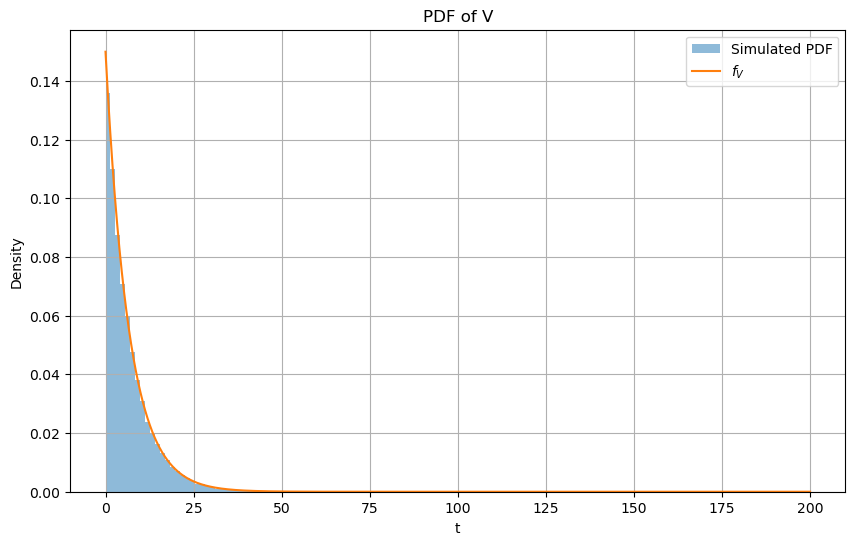

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(V_sim, bins=50, density=True, alpha=0.5, label="Simulated PDF")
plt.plot(t, fV, label="$f_V$")
plt.title("PDF of V")
plt.xlabel("t")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()

**Aquí la idea más interesante:** Imagínense que no hayan leído el enunciado del punto (b) y no supiesen cuál es la fórmula analítica de $f_V(x)$. Acabamos de ver que a partir de un sampleo de las variables aleatorias $X_i$, nos las ingeniamos para generar un histograma para reproducir dicha distribución! 

Este tipo de simulaciones se denominan *de Monte Carlo* y las veremos en profundidad en la segunda parte de la materia.

## Ejercicios propuestos para fijar ideas:

* Reproduzcan los resultados del notebook pero para $f_U(x)$.
* Prueben utilizar otra PDF distinta a la exponencial, por ejemplo una gaussiana. Cómo cambia el dominio de $t$? 